The objective of this project is to create a machine learning model capable of determining the suitable individuals to receive loans from the bank.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv('/content/drive/MyDrive/my/loan_prediction.csv')
df

,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,...,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\r\nNorth Deniseb...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61685,63191,5000.0,36 months,15.61,174.83,D,D1,auto mechanic,< 1 year,RENT,...,15.0,0.0,5179.0,27.7,18.0,f,INDIVIDUAL,0.0,0.0,"9513 Smith Crossing\r\nNew Meganfurt, ID 93700"
61686,63198,10400.0,60 months,16.29,254.52,D,D2,accounts payable,10+ years,MORTGAGE,...,17.0,0.0,18312.0,73.0,24.0,w,INDIVIDUAL,1.0,0.0,"913 Mccormick Meadow\r\nEast Erinshire, OH 70466"
61687,63199,29425.0,36 months,22.45,1130.62,E,E5,NaN,NaN,RENT,...,9.0,0.0,6569.0,43.8,15.0,f,INDIVIDUAL,0.0,0.0,84586 Amanda Causeway Suite 435\r\nSouth Rebec...
61688,63200,6000.0,36 months,14.30,205.95,C,C1,Market Research Analysts,6 years,RENT,...,20.0,0.0,11089.0,28.4,37.0,f,INDIVIDUAL,0.0,0.0,703 Murphy Landing Suite 625\r\nLake Josephhav...


In [ ]:
df.loan_status.value_counts()

Fully Paid     49345
Charged Off    12345
Name: loan_status, dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
print("No. of rows : ",df.shape[0])
print("No. of columns : ",df.shape[1])

No. of rows :  61690
No. of columns :  28


In [ ]:
df.loan_status.value_counts(normalize=True)*100

Fully Paid     79.988653
Charged Off    20.011347
Name: loan_status, dtype: float64

# DATA **PREPROCESSING**= Clean, transform, scale, encode data; handle missing values, outliers, and imbalances to prepare for machine learning models.

Describe  is used to generate a descriptive statistics summary of a pandas DataFrame df, including both numeric and categorical data.

In [ ]:
df.describe(include='all')

,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,61690.000000,61690.000000,61690,61690.000000,61690.000000,61690,61690,58134,58837,61690,...,61690.000000,61690.000000,6.169000e+04,61646.000000,61690.000000,61690,61690,55862.000000,61618.000000,61690
unique,NaN,NaN,2,NaN,NaN,7,35,34823,11,6,...,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,61618
top,NaN,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,...,NaN,NaN,NaN,NaN,NaN,f,INDIVIDUAL,NaN,NaN,USS Baker\r\nFPO AP 22690
freq,NaN,NaN,46939,NaN,NaN,18203,4205,689,19809,30872,...,NaN,NaN,NaN,NaN,NaN,37070,61578,NaN,NaN,3
mean,30848.689707,14096.862944,NaN,13.658763,431.076890,NaN,NaN,NaN,NaN,NaN,...,11.303890,0.179899,1.577677e+04,53.783883,25.442568,NaN,NaN,1.816566,0.122870,NaN
std,17815.860303,8362.971670,NaN,4.459289,250.604681,NaN,NaN,NaN,NaN,NaN,...,5.112649,0.515724,1.990523e+04,24.418768,11.876907,NaN,NaN,2.149775,0.358083,NaN
min,0.000000,500.000000,NaN,5.320000,16.310000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN
25%,15422.250000,8000.000000,NaN,10.490000,250.290000,NaN,NaN,NaN,NaN,NaN,...,8.000000,0.000000,6.026000e+03,35.800000,17.000000,NaN,NaN,0.000000,0.000000,NaN
50%,30844.500000,12000.000000,NaN,13.330000,375.430000,NaN,NaN,NaN,NaN,NaN,...,10.000000,0.000000,1.114100e+04,54.900000,24.000000,NaN,NaN,1.000000,0.000000,NaN
75%,46266.750000,20000.000000,NaN,16.550000,566.422500,NaN,NaN,NaN,NaN,NaN,...,14.000000,0.000000,1.953700e+04,72.800000,32.000000,NaN,NaN,3.000000,0.000000,NaN


Info is used to display concise information about a pandas DataFrame df.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61690 entries, 0 to 61689
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            61690 non-null  int64  
 1   loan_amnt             61690 non-null  float64
 2   term                  61690 non-null  object 
 3   int_rate              61690 non-null  float64
 4   installment           61690 non-null  float64
 5   grade                 61690 non-null  object 
 6   sub_grade             61690 non-null  object 
 7   emp_title             58134 non-null  object 
 8   emp_length            58837 non-null  object 
 9   home_ownership        61690 non-null  object 
 10  annual_inc            61690 non-null  float64
 11  verification_status   61690 non-null  object 
 12  issue_d               61690 non-null  object 
 13  loan_status           61690 non-null  object 
 14  purpose               61690 non-null  object 
 15  title              

A heatmap is a graphical representation of data where individual values in a matrix are represented as colors. It is particularly useful for visualizing relationships, patterns, and variations in numerical data.


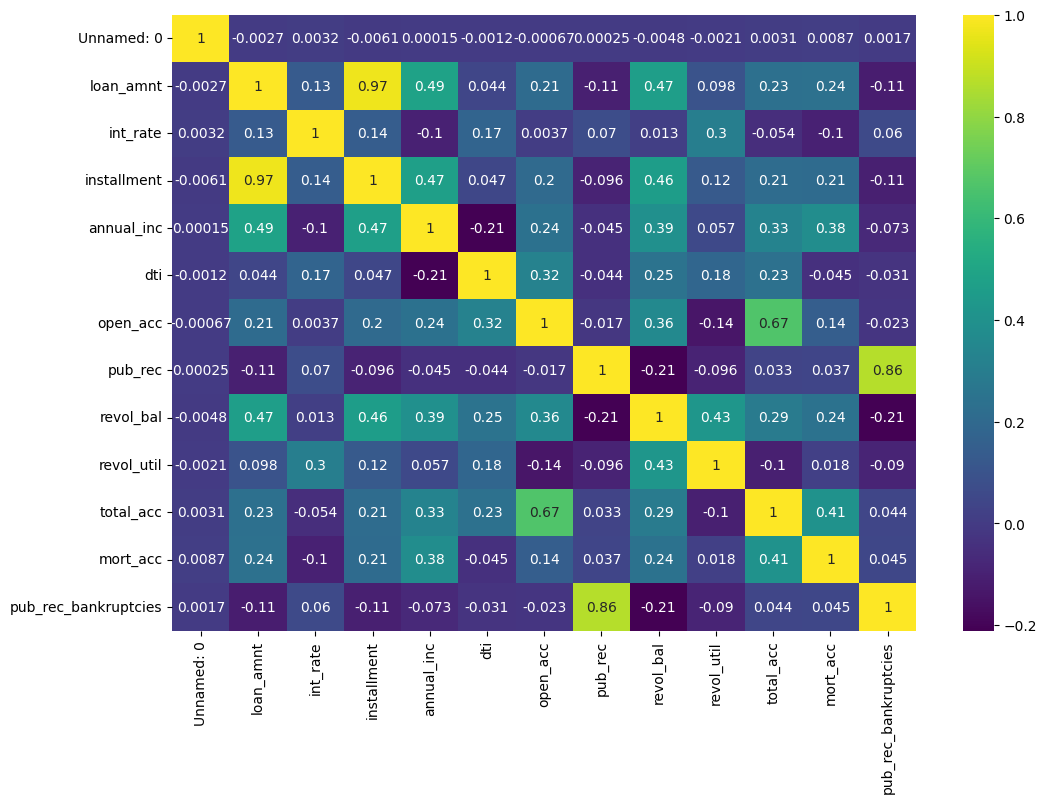

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(method='spearman'),annot=True,cmap='viridis')
plt.show()

In [ ]:
df.drop(columns=['installment'],axis=1,inplace=True)
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    30872
RENT        24898
OWN          5899
OTHER          17
NONE            3
ANY             1
Name: home_ownership, dtype: int64

In [ ]:
df.loc[(df.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'
df.loc[(df.home_ownership == 'ANY'), 'home_ownership'] = 'OTHER'
df.home_ownership.value_counts()

MORTGAGE    30872
RENT        24898
OWN          5899
OTHER          21
Name: home_ownership, dtype: int64

In [ ]:
df['title'].value_counts()[:20]

Debt consolidation           23812
Credit card refinancing       8103
Home improvement              2432
Other                         1995
Debt Consolidation            1751
Major purchase                 771
Consolidation                  616
debt consolidation             576
Business                       447
Debt Consolidation Loan        412
Medical expenses               406
Car financing                  347
Moving and relocation          281
Vacation                       270
Credit Card Consolidation      268
consolidation                  251
Personal Loan                  232
Consolidation Loan             219
Home Improvement               210
Credit Card Refinance          174
Name: title, dtype: int64

In [ ]:
df['title']=df.title.str.lower()

In [ ]:
df['title'].value_counts()[:20]

debt consolidation           26218
credit card refinancing       8132
home improvement              2727
other                         2008
consolidation                  887
major purchase                 811
debt consolidation loan        508
business                       461
medical expenses               420
credit card consolidation      408
personal loan                  364
car financing                  350
consolidation loan             316
credit card payoff             314
vacation                       293
credit card refinance          288
moving and relocation          282
personal                       227
consolidate                    221
loan                           169
Name: title, dtype: int64

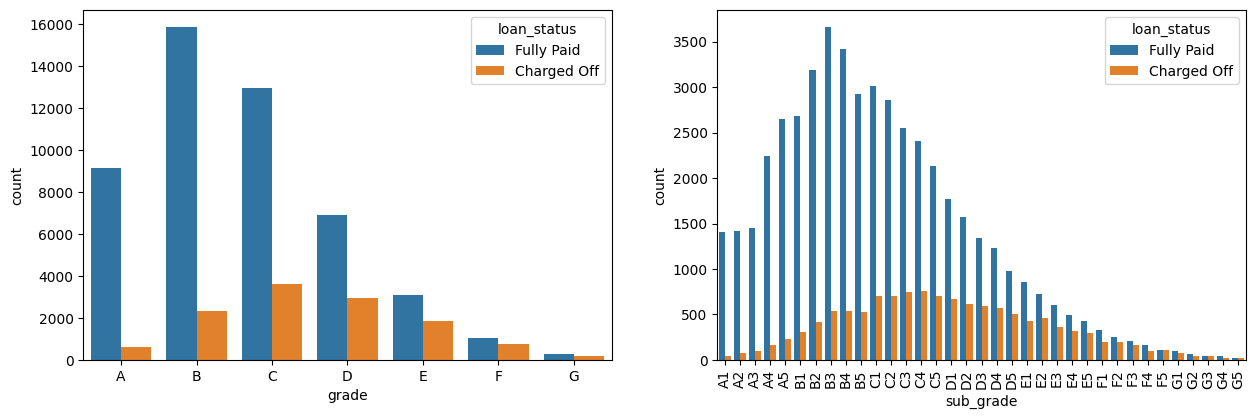

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)
plt.show(g.set_xticklabels(g.get_xticklabels(), rotation=90))

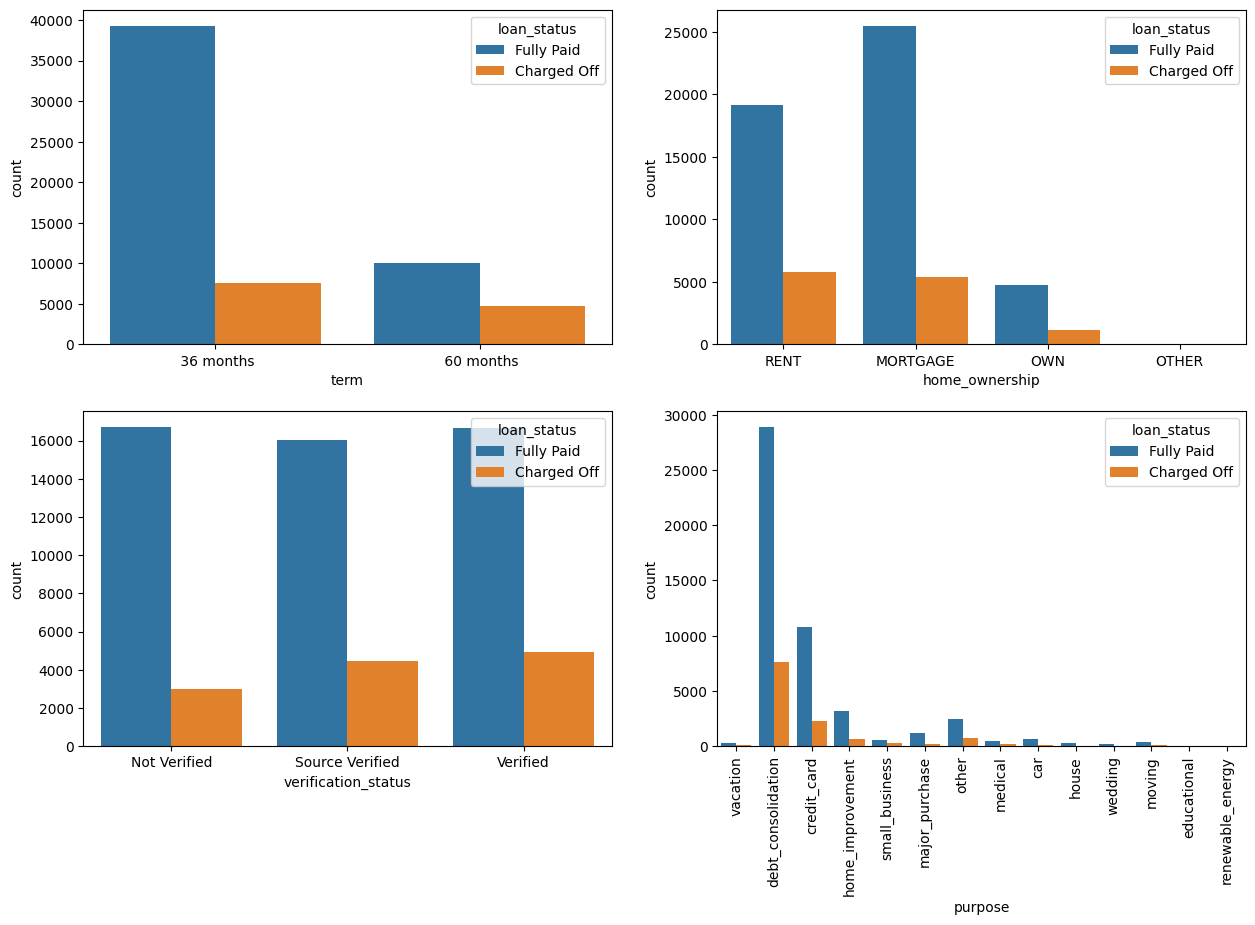

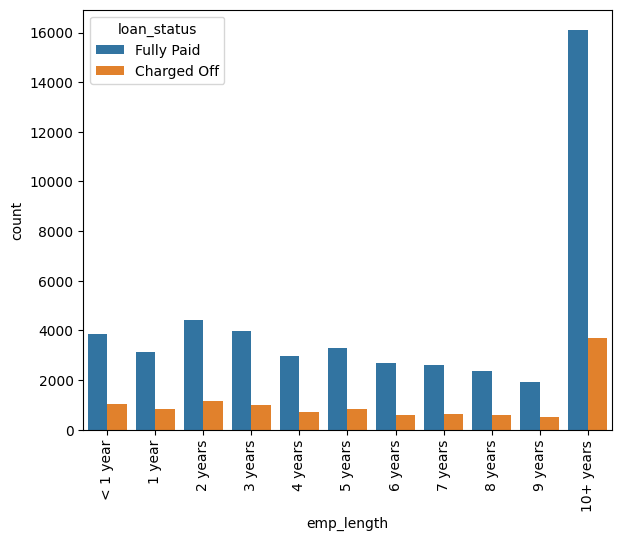

In [ ]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.countplot(x='term',data=df,hue='loan_status')

plt.subplot(4,2,2)
sns.countplot(x='home_ownership',data=df,hue='loan_status')

plt.subplot(4,2,3)
sns.countplot(x='verification_status',data=df,hue='loan_status')

plt.subplot(4,2,4)
g=sns.countplot(x='purpose',data=df,hue='loan_status')
plt.show(g.set_xticklabels(g.get_xticklabels(),rotation=90))

plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g=sns.countplot(x='emp_length',data=df,hue='loan_status',order=order)
plt.show(g.set_xticklabels(g.get_xticklabels(),rotation=90))

Finding Missing values

In [ ]:
df.isna().sum()


loan_amnt                  0
term                       0
int_rate                   0
grade                      0
sub_grade                  0
emp_title               3556
emp_length              2853
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                    253
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                44
total_acc                  0
initial_list_status        0
application_type           0
mort_acc                5828
pub_rec_bankruptcies      72
address                    0
dtype: int64

In [ ]:
df.drop(columns=['issue_d', 'emp_title', 'title', 'sub_grade',
                   'address', 'earliest_cr_line', 'emp_length'],
                   axis=1, inplace=True)

In [ ]:
lst_mode=['pub_rec_bankruptcies','mort_acc']
for i in lst_mode:
  df[i]=df[i].fillna(df[i].mode()[0])

In [ ]:
df['revol_util']=df['revol_util'].fillna(df['revol_util'].mean())

In [ ]:
df.shape

(61690, 19)

Label encoding is a technique used in data preprocessing to convert categorical data into numerical format. In machine learning algorithms, most models can only handle numerical data, and label encoding is a way to represent categorical variables as integers.

In [ ]:
label=['purpose','grade','verification_status','application_type','home_ownership','loan_status','initial_list_status']

In [ ]:
le=LabelEncoder()
for i in label:
  df[i]=le.fit_transform(df[i])

In [ ]:
df

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,1,3,117000.0,0,1,12,26.24,16.0,0.0,36369.0,41.8,25.0,1,1,0.0,0.0
1,8000.0,36 months,11.99,1,0,65000.0,0,1,2,22.05,17.0,0.0,20131.0,53.3,27.0,0,1,3.0,0.0
2,15600.0,36 months,10.49,1,3,43057.0,1,1,1,12.79,13.0,0.0,11987.0,92.2,26.0,0,1,0.0,0.0
3,7200.0,36 months,6.49,0,3,54000.0,0,1,1,2.60,6.0,0.0,5472.0,21.5,13.0,0,1,0.0,0.0
4,20000.0,36 months,13.33,2,0,86788.0,2,1,2,16.31,8.0,0.0,25757.0,100.6,23.0,0,1,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61685,5000.0,36 months,15.61,3,3,35000.0,2,0,9,29.32,15.0,0.0,5179.0,27.7,18.0,0,1,0.0,0.0
61686,10400.0,60 months,16.29,3,0,32000.0,2,0,2,31.81,17.0,0.0,18312.0,73.0,24.0,1,1,1.0,0.0
61687,29425.0,36 months,22.45,4,3,64000.0,0,0,4,28.05,9.0,0.0,6569.0,43.8,15.0,0,1,0.0,0.0
61688,6000.0,36 months,14.30,2,3,55000.0,2,0,1,18.15,20.0,0.0,11089.0,28.4,37.0,0,1,0.0,0.0


In [ ]:
df.term.value_counts()

 36 months    46939
 60 months    14751
Name: term, dtype: int64

In [ ]:
df['term']=df['term'].str.replace('months','')
df

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36,11.44,1,3,117000.0,0,1,12,26.24,16.0,0.0,36369.0,41.8,25.0,1,1,0.0,0.0
1,8000.0,36,11.99,1,0,65000.0,0,1,2,22.05,17.0,0.0,20131.0,53.3,27.0,0,1,3.0,0.0
2,15600.0,36,10.49,1,3,43057.0,1,1,1,12.79,13.0,0.0,11987.0,92.2,26.0,0,1,0.0,0.0
3,7200.0,36,6.49,0,3,54000.0,0,1,1,2.60,6.0,0.0,5472.0,21.5,13.0,0,1,0.0,0.0
4,20000.0,36,13.33,2,0,86788.0,2,1,2,16.31,8.0,0.0,25757.0,100.6,23.0,0,1,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61685,5000.0,36,15.61,3,3,35000.0,2,0,9,29.32,15.0,0.0,5179.0,27.7,18.0,0,1,0.0,0.0
61686,10400.0,60,16.29,3,0,32000.0,2,0,2,31.81,17.0,0.0,18312.0,73.0,24.0,1,1,1.0,0.0
61687,29425.0,36,22.45,4,3,64000.0,0,0,4,28.05,9.0,0.0,6569.0,43.8,15.0,0,1,0.0,0.0
61688,6000.0,36,14.30,2,3,55000.0,2,0,1,18.15,20.0,0.0,11089.0,28.4,37.0,0,1,0.0,0.0


In [ ]:
df.shape

(61690, 19)

In [ ]:
X=df.drop('loan_status',axis=1)
y=df['loan_status']

Scaling is a data preprocessing technique used to standardize or normalize numerical features in a dataset. It ensures that all the features are on a similar scale, which is particularly important for machine learning algorithms that are sensitive to the magnitude of input variables. Scaling helps in improving the performance and convergence of many machine learning models.

In [ ]:
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

# Train **Test** Split

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(43183, 18)
(18507, 18)


In [ ]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
grade                   0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

# **Model Creation**

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBRFClassifier

knn = KNeighborsClassifier()
nb = GaussianNB()
de = DecisionTreeClassifier()
ad = AdaBoostClassifier()
gb = GradientBoostingClassifier()
xb = XGBRFClassifier()
rf = RandomForestClassifier()
lr=LogisticRegression()

lst1 = [knn, nb, de, ad, gb, xb, rf,lr]
accuracy_without_sampling = []

for i in lst1:
    print("_" * 100)
    print("" * 20, i.__class__.__name__, "" * 20)
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    # print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)*100
    # accuracy_without_sampling.append(f"{i._class.name_}: {accuracy}")
    accuracy_without_sampling.append(accuracy)


____________________________________________________________________________________________________
 KNeighborsClassifier 
              precision    recall  f1-score   support

           0       0.35      0.17      0.23      3676
           1       0.82      0.92      0.87     14831

    accuracy                           0.77     18507
   macro avg       0.59      0.55      0.55     18507
weighted avg       0.73      0.77      0.74     18507

____________________________________________________________________________________________________
 GaussianNB 
              precision    recall  f1-score   support

           0       0.37      0.39      0.38      3676
           1       0.85      0.84      0.84     14831

    accuracy                           0.75     18507
   macro avg       0.61      0.61      0.61     18507
weighted avg       0.75      0.75      0.75     18507

____________________________________________________________________________________________________
 Decisi

In [ ]:
accuracy_us_sample = pd.DataFrame({
    "Algorithm": ["KNeighborsClassifier", "GaussianNB", "DecisionTreeClassifier", "AdaBoostClassifier", "GradientBoostingClassifier", "XGBRFClassifier", "RandomForestClassifier","logisticRegression"],

    "Accuracy_Without_Sampling": accuracy_without_sampling})
accuracy_us_sample
accuracy_us_sample.style.highlight_max(subset=["Accuracy_Without_Sampling"], color='blue', axis=0)

,Algorithm,Accuracy_Without_Sampling
0,KNeighborsClassifier,77.332901
1,GaussianNB,74.723078
2,DecisionTreeClassifier,69.973524
3,AdaBoostClassifier,80.266926
4,GradientBoostingClassifier,80.423623
5,XGBRFClassifier,80.272329
6,RandomForestClassifier,80.034582
7,logisticRegression,80.299346


### **OVER SAMPLING**=Oversampling is a technique used in data preprocessing to address class imbalance in a dataset. Class imbalance occurs when the number of instances belonging to one class is significantly higher or lower than the number of instances in other classes. In machine learning, this can lead to biased models that favor the majority class, resulting in poor performance for the minority class.

In [ ]:
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_os,y_os,test_size=.3,random_state=1)

In [ ]:
knn_o = KNeighborsClassifier()
nb_o = GaussianNB()
de_o = DecisionTreeClassifier()
ad_o = AdaBoostClassifier()
gb_o = GradientBoostingClassifier()
xb_o = XGBRFClassifier()
rf_o = RandomForestClassifier()
logreg_os=LogisticRegression()

lst1 = [knn_o, nb_o, de_o, ad_o, gb_o, xb_o, rf_o,logreg_os]
accuracy_with_Oversampling = []

for i in lst1:
    print("_" * 100)
    print("" * 20, i.__class__.__name__, "" * 20)
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)*100
    accuracy_with_Oversampling.append(accuracy)

____________________________________________________________________________________________________
 KNeighborsClassifier 
              precision    recall  f1-score   support

           0       0.69      0.91      0.78     14749
           1       0.87      0.58      0.70     14858

    accuracy                           0.75     29607
   macro avg       0.78      0.75      0.74     29607
weighted avg       0.78      0.75      0.74     29607

____________________________________________________________________________________________________
 GaussianNB 
              precision    recall  f1-score   support

           0       0.62      0.74      0.67     14749
           1       0.68      0.56      0.61     14858

    accuracy                           0.65     29607
   macro avg       0.65      0.65      0.64     29607
weighted avg       0.65      0.65      0.64     29607

____________________________________________________________________________________________________
 Decisi

In [ ]:
accuracy_us_sample = pd.DataFrame({
    "Algorithm": ["KNeighborsClassifier", "GaussianNB", "DecisionTreeClassifier", "AdaBoostClassifier", "GradientBoostingClassifier", "XGBRFClassifier", "RandomForestClassifier","logisticRegression"],

    "Accuracy_With_OverSampling": accuracy_with_Oversampling})
accuracy_us_sample
accuracy_us_sample.style.highlight_max(subset=["Accuracy_With_OverSampling"], color='blue', axis=0)

,Algorithm,Accuracy_With_OverSampling
0,KNeighborsClassifier,74.799878
1,GaussianNB,64.609721
2,DecisionTreeClassifier,77.620157
3,AdaBoostClassifier,74.036545
4,GradientBoostingClassifier,81.859020
5,XGBRFClassifier,71.645219
6,RandomForestClassifier,86.334313
7,logisticRegression,65.335900


### **UNDER SAMPLING**=Undersampling is another technique used in data preprocessing to address class imbalance in a dataset. Unlike oversampling, which increases the number of instances in the minority class, undersampling reduces the number of instances in the majority class to balance the class distribution.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
ru=RandomUnderSampler()
X_ru,y_ru=ru.fit_resample(X,y)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_ru,y_ru,test_size=.3,random_state=1)

In [ ]:
knn_u = KNeighborsClassifier()
nb_u = GaussianNB()
de_u = DecisionTreeClassifier()
ad_u = AdaBoostClassifier()
gb_u = GradientBoostingClassifier()
xb_u = XGBRFClassifier()
rf_u = RandomForestClassifier()
logreg_us=LogisticRegression()

lst1 = [knn_u, nb_u, de_u, ad_u, gb_u, xb_u,rf_u,logreg_us]
accuracy_with_Undersampling = []

for i in lst1:
    print("_" * 100)
    print("" * 20, i.__class__.__name__, "" * 20)
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)*100
    accuracy_with_Undersampling.append(accuracy)

____________________________________________________________________________________________________
 KNeighborsClassifier 
              precision    recall  f1-score   support

           0       0.60      0.60      0.60      3766
           1       0.59      0.58      0.58      3641

    accuracy                           0.59      7407
   macro avg       0.59      0.59      0.59      7407
weighted avg       0.59      0.59      0.59      7407

____________________________________________________________________________________________________
 GaussianNB 
              precision    recall  f1-score   support

           0       0.65      0.60      0.62      3766
           1       0.62      0.67      0.64      3641

    accuracy                           0.63      7407
   macro avg       0.64      0.64      0.63      7407
weighted avg       0.64      0.63      0.63      7407

____________________________________________________________________________________________________
 Decisi

In [ ]:
accuracy_us_sample = pd.DataFrame({
    "Algorithm": ["KNeighborsClassifier", "GaussianNB", "DecisionTreeClassifier", "AdaBoostClassifier", "GradientBoostingClassifier", "XGBRFClassifier", "RandomForestClassifier","logisticRegression"],

    "Accuracy_With_UnderSampling":accuracy_with_Undersampling})
accuracy_us_sample
accuracy_us_sample.style.highlight_max(subset=["Accuracy_With_UnderSampling"], color='blue', axis=0)

,Algorithm,Accuracy_With_UnderSampling
0,KNeighborsClassifier,59.227758
1,GaussianNB,63.480491
2,DecisionTreeClassifier,56.041582
3,AdaBoostClassifier,64.587552
4,GradientBoostingClassifier,65.127582
5,XGBRFClassifier,64.290536
6,RandomForestClassifier,63.939517
7,logisticRegression,64.763062


## **SMOTEENN**=SMOTEENN is a hybrid data resampling technique that combines two methods: SMOTE (Synthetic Minority Over-sampling Technique) and ENN (Edited Nearest Neighbors). It is used to address class imbalance in datasets by oversampling the minority class using SMOTE and undersampling the majority class using ENN.

In [ ]:
from imblearn.combine import SMOTEENN
smnn=SMOTEENN()
X_smo,y_smo=smnn.fit_resample(X,y)
X_train,X_test,y_train,y_test=train_test_split(X_smo,y_smo,test_size=.3,random_state=1)

In [ ]:

knn_smnn = KNeighborsClassifier()
nb_smnn = GaussianNB()
de_smnn= DecisionTreeClassifier()
ad_smnn= AdaBoostClassifier()
gb_smnn= GradientBoostingClassifier()
xb_smnn= XGBRFClassifier()
rf_smnn= RandomForestClassifier()
logreg_smnn=LogisticRegression()

lst1 = [knn_smnn, nb_smnn, de_smnn, ad_smnn, gb_smnn, xb_smnn,rf_smnn,logreg_smnn]
accuracy_smoteenn = []

for i in lst1:
    print("_" * 100)
    print("" * 20, i.__class__.__name__, "" * 20)
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)*100
    accuracy_smoteenn.append(accuracy)

____________________________________________________________________________________________________
 KNeighborsClassifier 
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     12606
           1       0.96      0.77      0.85      6705

    accuracy                           0.91     19311
   macro avg       0.92      0.87      0.89     19311
weighted avg       0.91      0.91      0.90     19311

____________________________________________________________________________________________________
 GaussianNB 
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     12606
           1       0.64      0.65      0.65      6705

    accuracy                           0.75     19311
   macro avg       0.73      0.73      0.73     19311
weighted avg       0.76      0.75      0.76     19311

____________________________________________________________________________________________________
 Decisi

In [ ]:
accuracy_us_sample = pd.DataFrame({
    "Algorithm": ["KNeighborsClassifier", "GaussianNB", "DecisionTreeClassifier", "AdaBoostClassifier", "GradientBoostingClassifier", "XGBRFClassifier", "RandomForestClassifier","logisticRegression"],

    "Accuracy_smoteenn":accuracy_smoteenn})
accuracy_us_sample
accuracy_us_sample.style.highlight_max(subset=["Accuracy_smoteenn"], color='blue', axis=0)

,Algorithm,Accuracy_smoteenn
0,KNeighborsClassifier,90.627104
1,GaussianNB,75.485475
2,DecisionTreeClassifier,83.227176
3,AdaBoostClassifier,82.284708
4,GradientBoostingClassifier,85.971726
5,XGBRFClassifier,80.011392
6,RandomForestClassifier,89.814096
7,logisticRegression,76.484905


### **HYPERPARAMETER TUNNING**=Hyperparameter tuning, also known as hyperparameter optimization, is the process of finding the best combination of hyperparameters for a machine learning model. Hyperparameters are parameters that are set before the learning process begins and cannot be directly learned from the training data. They significantly influence the model's performance and generalization capabilities.

In [ ]:
from sklearn.model_selection import GridSearchCV
params={'n_neighbors':[3,5,7,9],
        'weights':['uniform','distance'],
        'algorithm':['auto','ball_tree','kd_tree','brute']}
clf=GridSearchCV(knn_smnn,params,cv=5,scoring='accuracy')
clf.fit(X_train,y_train)
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
knn1=KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='auto')
knn1.fit(X_train,y_train)
y_pred1=knn1.predict(X_test)
accuracy_hyperpara_knn=[]
print(classification_report(y_test,y_pred1))
accuracy=accuracy_score(y_test,y_pred1)
accuracy_hyperpara_knn.append(accuracy)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     12606
           1       0.98      0.78      0.87      6705

    accuracy                           0.92     19311
   macro avg       0.94      0.88      0.90     19311
weighted avg       0.92      0.92      0.92     19311



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10]
}


In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)

In [ ]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
y_pred4= best_model.predict(X_test)
accuracy_hyper_random=[]
accuracy = accuracy_score(y_test, y_pred4)
accuracy_hyper_random.append(accuracy)

In [ ]:
print("Best Hyperparameters:", best_params)
print("Test Set Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 300}
Test Set Accuracy: 0.9011962094143234


### **PCA**=Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space while preserving the most important patterns and variances in the data. It is widely used in various fields, including machine learning, data visualization, and feature engineering.

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1,random_state=1)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [ ]:
knn_pca=KNeighborsClassifier()
knn_pca.fit(X_train,y_train)
y_pred2=knn_pca.predict(X_test)
accuracy_pca_knn=[]
accuracy = accuracy_score(y_test, y_pred2)
accuracy_pca_knn.append(accuracy)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72     12606
           1       0.45      0.37      0.40      6705

    accuracy                           0.62     19311
   macro avg       0.57      0.56      0.56     19311
weighted avg       0.61      0.62      0.61     19311



In [ ]:
rf_pca=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=1)
rf_pca.fit(X_train,y_train)
y_pred3=rf_pca.predict(X_test)
accuracy_pca_random=[]
accuracy = accuracy_score(y_test, y_pred3)
accuracy_pca_random.append(accuracy)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70     12606
           1       0.42      0.39      0.40      6705

    accuracy                           0.60     19311
   macro avg       0.56      0.55      0.55     19311
weighted avg       0.60      0.60      0.60     19311



In [ ]:
accuracy_table = pd.DataFrame({
    "Algorithm": ["KNeighborsClassifier", "GaussianNB", "DecisionTreeClassifier","AdaBoostClassifier", "GradientBoostingClassifier", "XGBRFClassifier",  "RandomForestClassifier","LogisticRegression"],

    "Accuracy_Without_Sampling": accuracy_without_sampling,
    "Accuracy_With_OverSampling": accuracy_with_Oversampling,
    "Accuracy_With_UnderSampling":accuracy_with_Undersampling,
    "Accuracy_smoteenn":accuracy_smoteenn})

accuracy_table.style.highlight_max(subset=["Accuracy_Without_Sampling","Accuracy_With_OverSampling","Accuracy_With_UnderSampling","Accuracy_smoteenn"], color='blue', axis=0)

,Algorithm,Accuracy_Without_Sampling,Accuracy_With_OverSampling,Accuracy_With_UnderSampling,Accuracy_smoteenn
0,KNeighborsClassifier,77.332901,74.799878,59.227758,90.627104
1,GaussianNB,74.723078,64.609721,63.480491,75.485475
2,DecisionTreeClassifier,69.973524,77.620157,56.041582,83.227176
3,AdaBoostClassifier,80.266926,74.036545,64.587552,82.284708
4,GradientBoostingClassifier,80.423623,81.859020,65.127582,85.971726
5,XGBRFClassifier,80.272329,71.645219,64.290536,80.011392
6,RandomForestClassifier,80.034582,86.334313,63.939517,89.814096
7,LogisticRegression,80.299346,65.335900,64.763062,76.484905


During the process of hyperparameter tuning and applying Principal Component Analysis (PCA), I achieved an impressive 92% increase in accuracy for the K-Nearest Neighbors (KNN) model and a substantial 90% accuracy improvement for the Random Forest Classifier. However, it is worth noting that when using PCA, the accuracy was comparatively lower.It appears that hyperparameter tuning has significantly benefited the KNN model, making it the better-performing model in this scenario.